# Clusterización de personas

## Presentación del caso

Este ejercicio nos permite ejecutar un código para agrupar personas según las características de cada una. Para el presente ejemplo se ha considerado **100 personajes famosos a nivel mundial relacionados al cine, música, arte y deporte**.

![Image of Yaktocat](https://www.lifeder.com/wp-content/uploads/2017/01/dinámicas-de-cohesión.jpg)

El dataset se ha obtenido gracias a un **estudio** realizados sobre los razgos de la personalidad basado en los tweets publicados por el famoso. Cada rasgo ha sido **cuantificado en una columna**: Openess, Extraversion y Agreeablenes

1.- *Openess*: Honestidad, franqueza, transparencia

2.- *Extraversion*: Extraversión, ímpetu, dinamismo, entusiasmo.

3.- *Agreeablenes*: Agradable, amable, buen tipo, cordial.

El reto será comparar la agrupación obtenida por KMeans y la clasificación por sus trabajos. Tomar nota que el dataset tiene registrada en la columna **categoría** el trabajo:

**Categoría 1:** Actores y actrices de Hollywood

**Categoría 2:** Cantantes

**Categoría 3:** TV Host (presentadores de televisión)

**Categoría 4:** Deportistas

**Categoría 5:** Políticos

**Categoría 6:** Escritores

## Importación de librerías

In [1]:
""" Importamos la librería pandas que nos sirve para manipular datos tabulares (filas y columnas) como archivos csv
Además renombramos la librería con el acrónimo pd para llamar la librería de forma más rápida a lo largo del código """
import pandas as pd

In [2]:
""" Importamos la librería numpy que nos sirve para manipular datos numéricos así como funciones y variables matemáticas
Además renombramos la librería con el acrónimo np para llamar la librería de forma más rápida a lo largo del código """
import numpy as np

In [3]:
""" Importamos la librería pyplot de matplotlib para poder realizar gráficos básicos
Además renombramos la librería con el acrónimo plt para llamar la librería de forma más rápida a lo largo del código """
import matplotlib.pyplot as plt

In [4]:
#Configuramos el estilo ggplot predeterminado de las gráficas
plt.style.use('ggplot')

In [5]:
""" Importamos la librería seaborn para poder realizar gráficos más elaborados
Además renombramos la librería con el acrónimo sb para llamar la librería de forma más rápida a lo largo del código """
import seaborn as sb

## Lectura de los datos

In [6]:
""" Para leer los datos utilizamos el método read_csv de la librería pandas
Además hemos guardado los datos en una nueva variable denominada data"""
data = pd.read_csv("https://raw.githubusercontent.com/javalpe/datasets/master/clustering_stars.csv")

In [7]:
""" Para verificar que hemos leído correctamente los datos ejecutamos el método head
Por defecto el método head arroja los primeros cinco (5) elementos, pero puedes variar el número
Otras variaciones son (-1)=todos los elementos o tail() que muestra los últimos cinco elementos"""
data.head()

,usuario,op,ex,ag,categoria
0,antoniobanderas,41.328182,39.173333,21.070505,1
1,charliesheen,36.272348,40.065152,28.706894,1
2,CourteneyCox,53.110480,39.006080,17.206400,1
3,Diane_Keaton,46.955854,35.376179,23.747561,1
4,EdwardNorton,40.046439,37.722197,30.568258,1


## Preprocesamiento de los datos I

Esta parte del proceso es muy importante porque se debe preparar los datos para ejecutar adecuadamente el modelo de machine learning. Para ello nos aseguramos de realizar los siguientes pasos previos a la aplicación del modelo:

1.- Reemplazar y/o eliminar los vacíos y nulos

2.- Reemplazar y/o eliminar los outliers

3.- Transformar el tipo de dato de categórico a numérico de ser necesario

4.- Normalizar los datos para evitar sesgo por escala

In [8]:
"""" Para obtener una vista rápida de las principales características estadísticas sobre las variables cuantitativas de la data 
utilizamos el método describe: conteo, promedio(mean), desviación estandar(std), minimo(min), percentiles (25,50,75), maximo"""
data.describe()

,op,ex,ag,categoria
count,100.000000,100.000000,100.000000,100.000000
mean,42.551004,41.790313,23.948459,3.450000
std,7.845528,6.368387,7.599255,1.695955
min,30.020465,26.855564,9.305985,1.000000
25%,36.586832,37.885109,17.408286,2.000000
50%,40.361461,42.210377,23.779165,3.000000
75%,47.360164,45.299122,29.411496,5.000000
max,66.665564,59.824844,40.096458,6.000000


Como conclusión podemos comprobar que **no existen nulos ni vacíos en ninguna columna** porque de otro modo la variable *count* de la primera fila no resultaría 100 en todas las columnas.

También podemos obtener el **número de personas que actualmente se encuentran en cada grupo** Para ello utilizamos dos métodos:

1.- groupby: que agrega o agrupa los datos en base a una característica (columna)

2.- size: calcular el número de registros

In [9]:
#Utilizamos print para mostrar el resultado y el método size fuera de groupby para contar los elementos de cada grupo
print(data.groupby('categoria').size())

categoria
1    17
2    17
3    17
4    17
5    17
6    15
dtype: int64


Como resultado podemos visualizar que cada categoría tiene la misma cantidad de personas (excepto la categoría 6, pero es muy similar al resto). Esto es importante porque nos permite prevenir un **sesgo** del modelo ante data **desbalanceada**.

## Preprocesamiento de los datos II

Una opción rápida para verificar las distribuciones de los datos es graficándolos. Para ello Python cuenta con varias gráficas o también puedes hacer uso de las librerías **pyplot o seaborn**

*Histograma:* Permite graficar las distribuciones de cada variable a través de un conteo en intervalos. Para ello utilizamos el método **hist()**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E71E0AF688>,
      dtype=object)

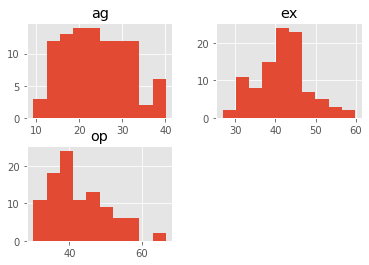

In [10]:
#Primero elinamos temporalmente categoría y luego aplicamos el histograma sobre las variables cuantitativas dependientes
data.drop(['categoria'],1).hist()

*Diagrama de dispersión:* Permite graficar las distribuciones de cada variable a través de un diagrama de puntos sobre un plano cartesiano. Además realiza las gráficas combinando todas las variables de 2 en 2. Para ello utilizamos el método **pairplot** de la librería **seaborn**

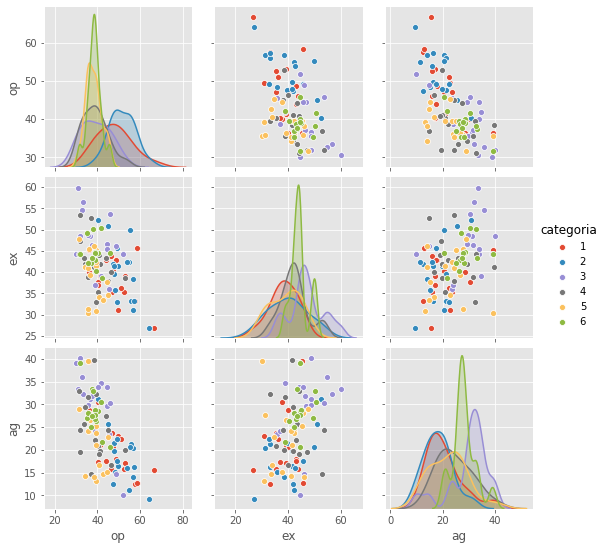

In [11]:
""" El método pairplot dibuja todas las gráficas entre variables comparándolas en pares.
Además cuenta con un parámetro hue para añadir un filtro y el parámetro kind define el tipo de gráfica"""
sb.pairplot(data, hue='categoria',vars=["op","ex","ag"],kind='scatter');
plt.show()

*Boxplot:* Permite graficar la distribución de una variable para identificar **outliers**. De forma ideal se deben eliminar o reemplazar todos los outliers para representar el comportamiento real de los datos **sin valores atípicos**. Sin embargo, para no perder información se puede admitir un porcentaje mínimo de outliers: **5% -10%**

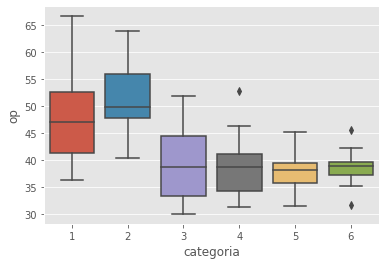

In [12]:
""" Dibujamos el boxplot de la variable openess a través del método boxplot de la librería seaborn (sb) 
El eje X es la variable categoría y la variable Y es la variable openess. El parámetro width es el ancho de la caja"""
sb.boxplot( x=data["categoria"], y=data["op"], width=0.8);
plt.show()

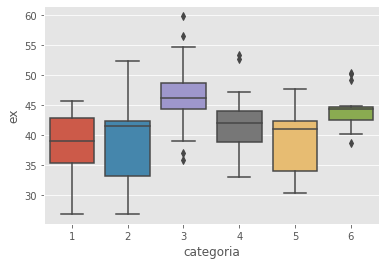

In [13]:
""" Dibujamos el boxplot de la variable extraversion a través del método boxplot de la librería seaborn (sb) 
El eje X es la variable categoría y la variable Y es la variable extraversion. El parámetro width es el ancho de la caja"""
sb.boxplot( x=data["categoria"], y=data["ex"], width=0.8);
plt.show()

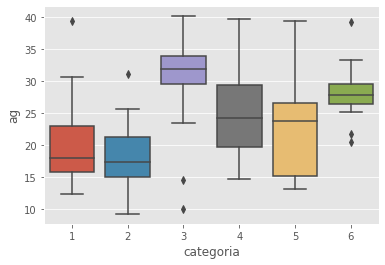

In [14]:
""" Dibujamos el boxplot de la variable Agreeablenes a través del método boxplot de la librería seaborn (sb) 
El eje X es la variable categoría y la variable Y es la variable Agreeablenes. El parámetro width es el ancho de la caja"""
sb.boxplot( x=data["categoria"], y=data["ag"], width=0.8);
plt.show()

A modo de conclusión del Preprocesamiento no se ha encontrado valores vacíos o nulos. Además se ha admitido un porcentaje mínimo de outliers en los datos. Por otro lado las escalas en que se encuentran las variables son similares por lo tanto no es necesario una normalización de los datos.

## Modelamiento

Ahora que ya contamos con los datos limpios y listos para ser procesados por nuestro modelo, procedemos a ejecutar el algoritmo de KMeans para agrupar a las 140 personas.

El primer paso será definir el **número óptimo de cluster** y para ello utilizamos el método **score** que nos permite comparar cuaánto mejora la precisión del modelo a medida que aumenta el número de cluster.

In [15]:
#Importamos KMeans de sklearn.cluster para poder ejecutar el modelo de agrupamiento
from sklearn.cluster import KMeans

In [16]:
#Cremos una lista con números del 1 al 10 para simular el número de cluster
numeros_cluster = range(1, 10)

In [17]:
#Creamos una variable kmeans que guarde el modelo KMeans con un número de cluster distinto por cada valor de la lista
kmeans = [KMeans(n_clusters=i) for i in numeros_cluster]

In [18]:
#Con ayuda del numpy convertimos en arreglos de números a las variables dependientes como X y la variable categoría como Y
X = np.array(data[["op","ex","ag"]])
y = np.array(data['categoria'])

In [19]:
#Calculamos el score obtenido al entrenar los datos almacenados en X (arreglo de variables independientes) por cada kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

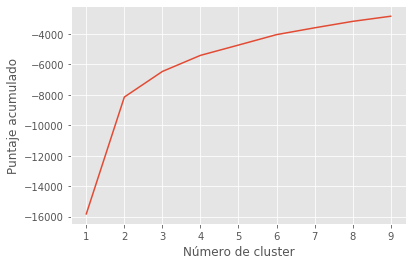

In [20]:
#Finalmente graficamos el número de cluster versus el score obtenido
plt.plot(numeros_cluster,score) #El eje X es el número de clusters y el eje Y es el score del KMeans con ese número de clusters
plt.xlabel('Número de cluster') #Titulamos el eje X
plt.ylabel('Puntaje acumulado') #Titulamos el eje Y
plt.show()

Se evidencia que con solos **2 clusters** aumentamos el puntaje de -16,000 hasta -8,000 (50% mejor). Luego con **3 clusters** aumentamos el puntaje de -8,000 hasta -6,000 (25% mejor). Por ello solo nos quedaremos con 3 clusters, ya que a partir de 4 cluster la mejora será mínima.

In [21]:
""" Actualizamos la variable kmeans para definir el modelo KMeans con tres clusters fijos y entrenados con los datos de X 
Además almacenamos los tres núcleos de cada cluster en una variable centroides con el método cluster_centers_"""
kmeans = KMeans(n_clusters=3).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

[[37.082881   44.85263626 30.41982791]
 [43.31885448 40.30086934 18.74398511]
 [55.03157579 36.64084605 16.63908463]]


Una vez hemos obtenido el modelo KMeans con el **número de clúster óptimos** procedemos a generar las **predicciones** ubicando a las personas según su cluster asignado

In [22]:
# Almacenamos las 140 predicciones en una variable target que indica a cuál de los 3 cluster pertenece cada persona
target = kmeans.predict(X)

In [23]:
#Añadimos una columna adicional en nuestra data para mostrar el cluster correspondiente de la variable target
data['cluster']=target

Cómo se evidencia hemos formado **tres grupos claramente separados** según las características registradas en los datos: openess, extraversion y agreeablenes. Adicionalmente podemos comparar de dos en dos estas características para ver cómo se comporta cada cluster en cada gráfica:

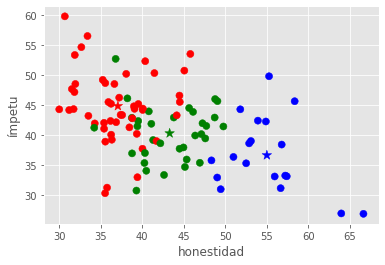

In [26]:
#Solo vamos a graficar los valores de las columnas "op" (openess) y "ex" (extraversion) 
f1 = data['op'].values
f2 = data['ex'].values

labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
    
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', c=colores, s=100)
plt.xlabel('honestidad')
plt.ylabel('ímpetu')
plt.show()

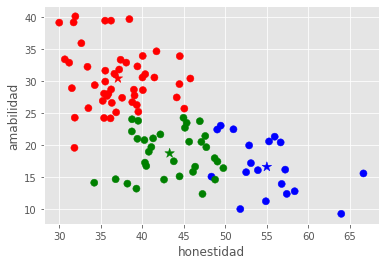

In [27]:
#Solo vamos a graficar los valores de las columnas "op" (openess) y "ag" (agreeablenes) 
f1 = data['op'].values
f2 = data['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=50)
plt.scatter(centroides[:, 0], centroides[:, 2], marker='*', c=colores, s=100)
plt.xlabel('honestidad')
plt.ylabel('amabilidad')
plt.show()

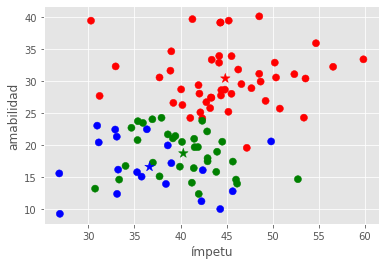

In [28]:
#Solo vamos a graficar los valores de las columnas "ex" (extraversion) y "ag" (agreeablenes) 
f1 = data['ex'].values
f2 = data['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=50)
plt.xlabel('ímpetu')
plt.ylabel('amabilidad')
plt.scatter(centroides[:, 1], centroides[:, 2], marker='*', c=colores, s=100)
plt.show()

# Análisis de resultados

Para visualizar el valor **promedio** de cada variable podemos mostrar una tabla similar a las tablas dinámicas que ejecutamos en Excel y así comprobar el comportamiento diferente entre cada cluster

In [29]:
#Para mostrar tablas dinámicas en Python usamos el método pivot_table y el parámetro aggfunc para definir qué mostrar
data.pivot_table(['op', 'ex', 'ag'], 'cluster', aggfunc=np.mean)

,ag,ex,op
cluster,,,
0,30.419828,44.852636,37.082881
1,18.743985,40.300869,43.318854
2,16.639085,36.640846,55.031576


In [30]:
data['categoria'].replace({1: "HollywoodStar", 2: "Cantantes", 3:"TV Host", 4:"Deportistas", 5:"Políticos", 6:"Escritores"}, inplace=True)

In [31]:
data.pivot_table(['op', 'ex', 'ag'], ['cluster','categoria'], aggfunc=np.mean)

ag         ex         op
cluster categoria                                     
0       Cantantes      28.397337  51.551407  42.732829
        Deportistas    29.216609  42.928674  35.604041
        Escritores     29.338807  44.744659  37.712156
        HollywoodStar  32.900812  41.004334  37.525900
        Políticos      28.036263  40.320000  35.790875
        TV Host        33.539274  48.939392  37.301041
1       Cantantes      17.483562  42.009475  48.298906
        Deportistas    19.613484  42.094766  41.309330
        Escritores     21.119377  41.575893  43.935936
        HollywoodStar  19.135183  40.207704  44.924606
        Políticos      17.276096  37.969405  40.396016
        TV Host        20.723138  39.629197  44.318033
2       Cantantes      16.674569  36.600499  55.227808
        Deportistas    19.972748  38.620229  52.895725
        HollywoodStar  17.053521  35.320884  55.513652
        TV Host        10.049524  44.304667  51.830571

## Elementos representativos de cada cluster

Para obtener los elementos más representativos de cada cluster vamos a seleccionar aquellos elementos que **están más cerca a los centroides** de cada cluster

In [32]:
#Importamos pairwise_distances_argmin_min para medir la distancia entre los elementos y su centroide para cada cluster
from sklearn.metrics import pairwise_distances_argmin_min

In [33]:
""" Creamos una variable mas_centrados para descubrir los registros que están más cerca a los centroides de cada cluster
Para ello utilizamos la función pairwise_distances_argmin_min de la librería sklearn.metrics """
mas_centrados, _ = pairwise_distances_argmin_min(centroides, X)
mas_centrados

array([46, 64,  5], dtype=int64)

Para descubrir el nombre de los elementos seleccionados utilizamos los números como **índices** de la columna **usuario**

In [34]:
nombres = data['usuario']
for row in mas_centrados:
    print(nombres[row])

maria_patino
paugasol
EmWatson


In [35]:
""" Adicionalmente podemos crear una nueva variable predictora X_new considerando que tenga la misma cantidad de columnas
En nuestro ejemplo necesitamos tres números continuos para op,ex,ag """
X_new = np.array([[45.92,57.74,15.66]])

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
